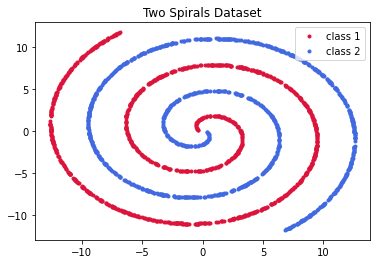

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def twospirals(n_points, noise=1):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

X, y = twospirals(1000, noise=1.0)

plt.title('Two Spirals Dataset')
plt.plot(X[y==0,0], X[y==0,1], '.', label='class 1', color='crimson')
plt.plot(X[y==1,0], X[y==1,1], '.', label='class 2', color='royalblue')
plt.legend()
plt.show()

In [ ]:
from sklearn.utils import shuffle
X, y = shuffle(X, y)

In [ ]:
# fix parameters alpha and iterations
alpha = 0.99
iterations = 400

In [ ]:
# label number of data to be used for training
labeled = 25
y_train = np.concatenate(((y[:labeled, None] == np.arange(2)).astype(float), np.zeros((y.shape[0] - labeled,2))))

In [ ]:
# construct affinity matrix W
from scipy.spatial.distance import cdist

def affin_W(X, sigma):
  dist = cdist(X, X, 'euclidean')
  Wij = np.exp(-dist / (2 * np.power(sigma, 2)))
  np.fill_diagonal(Wij, 0)
  return Wij

Wij = affin_W(X, 0.1)

In [ ]:
# construct matrix S
from fractions import Fraction  

def matrix_S(W):
  d = np.sum(W, axis=1)
  # diagonalize the matrix
  grid = d*d[:, np.newaxis]  
  D = np.sqrt(grid)
  S = np.divide(W,D,where=D!=0)
  return S

S = matrix_S(Wij)

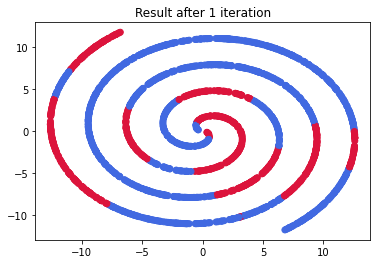

In [ ]:
# 1 iteration
F = np.dot(S, y_train) * alpha + (1 - alpha) * y_train

y_labeled = np.zeros_like(F)
y_labeled[np.arange(len(F)), F.argmax(1)] = 1
y_vector = [1 if x == 0 else 0 for x in y_labeled[0:, 0]]

color = ['crimson' if l == 0 else 'royalblue' for l in y_vector]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.title('Result after 1 iteration')
plt.show()

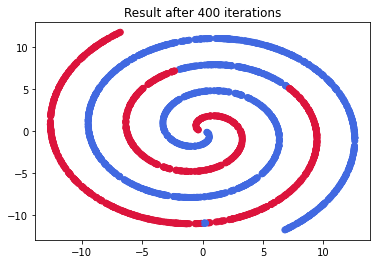

In [ ]:
# 400 iterations
for t in range(iterations):
  F = np.dot(S, F) * alpha + (1 - alpha) * y_train

y_labeled = np.zeros_like(F)
y_labeled[np.arange(len(F)), F.argmax(1)] = 1

y_vector = [1 if x == 0 else 0 for x in y_labeled[0:,0]]

color = ['crimson' if l == 0 else 'royalblue' for l in y_vector]
plt.scatter(X[0:,0], X[0:,1], color=color)
plt.title('Result after 400 iterations')
plt.show()